# Capstone Project
## *Exploring Spotify API Output via Spotipy*

The Spotify API is accessed using the `spotipy` Python library.

[Spotipy Documentation](https://spotipy.readthedocs.io/en/2.16.0/#")

This notebook is used to learn how to call and format information returned by the API.

Spotify URIs and ID's Explained here: https://developer.spotify.com/documentation/web-api/#spotify-uris-and-ids

Spotify audio features described here:
https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/


In this notebook:

* [Problem Statement](#problem-statement)
* [Exploring Spotify API Output via Spotipy](#explore-spotipy)

#### Import Libraries & Read in Data

In [1]:
## standard imports 
import pandas as pd 
import numpy as np
import seaborn as sns

import re
## visualizations
import matplotlib.pyplot as plt

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


# ## options
# import sklearn
# pd.options.display.max_rows = 4000
# pd.options.display.max_columns = 100
# pd.set_option('max_colwidth', 100)

In [2]:
clientID = 'c85f43a5a7004946996bc22659dd8de6'
clientSecret = '9f6e5b2d26af429ba2c3a77624f85a2d'

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=clientID,
                                                           client_secret=clientSecret))

### Sample Spotify URIs for testing

In [9]:
### ARTIST - Dalton & the Sheriffs
daltonURI = '6flzo4uffk7TCeZOq4qVQ3'
daltonID = daltonURI.rsplit('/', 1)[-1]

lannenFallID = '4xLmFQS5mGmWv10FAXMlwT'
lannenID = '51HrEYveVqvRgJAkvHndnO'

theScenicID = '5XVnRkU3WdpNw4xlYKq4kU'

### ALBUM - Luckier by Half
luckierID = '1v8tMGSGAsAn4KD78DFLq8'

### SONGS 
## Daves Street
davesID ='6em7Fr61PoOQLH9TkSHMGD?si=OlULtmUoTgyIzSdlrENk4w'

## Holding On
holdingID = '4vciFvUV0oLrkKrWrl00dS?si=SUixsbS2SJ2ayqYolV7z3A'

## You Ain't Her
youherID = '5UhjLywLttQtwI2EH5ZqPT'

### PLAYLISTS - This is ...
thisisID = '37i9dQZF1DZ06evO3GB840'

In [15]:
### testing recc function for hip-hop
WAP_uri = 'spotify:track:4Oun2ylbjFKMPTiaSbbCih'
WAP_track = sp.track(WAP_uri)
WAP_track['popularity']

97

In [11]:
WAP_features = sp.audio_features(WAP_uri)[0]
WAP_features

{'danceability': 0.935,
 'energy': 0.454,
 'key': 1,
 'loudness': -7.509,
 'mode': 1,
 'speechiness': 0.375,
 'acousticness': 0.0194,
 'instrumentalness': 0,
 'liveness': 0.0824,
 'valence': 0.357,
 'tempo': 133.073,
 'type': 'audio_features',
 'id': '4Oun2ylbjFKMPTiaSbbCih',
 'uri': 'spotify:track:4Oun2ylbjFKMPTiaSbbCih',
 'track_href': 'https://api.spotify.com/v1/tracks/4Oun2ylbjFKMPTiaSbbCih',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4Oun2ylbjFKMPTiaSbbCih',
 'duration_ms': 187541,
 'time_signature': 4}

In [10]:
type(WAP_features)

list

In [16]:
WAP_list = [WAP_track['popularity']]
WAP_list

[97]

In [17]:
features_key = ['acousticness', 'danceability', 'energy', 'speechiness', 'valence']
for feature in features_key:
    WAP_list.append(WAP_features[feature])
WAP_list

[97, 0.0194, 0.935, 0.454, 0.375, 0.357]

## Playing with Artist Information <a class="anchor" id="play-artist-info"></a>
<hr/>

In [10]:
dalton = sp.artist(daltonID)

In [11]:
dalton['popularity']

23

In [12]:
lannenFall = sp.artist(lannenFallID)

In [13]:
lannenFall

{'external_urls': {'spotify': 'https://open.spotify.com/artist/4xLmFQS5mGmWv10FAXMlwT'},
 'followers': {'href': None, 'total': 116},
 'genres': [],
 'href': 'https://api.spotify.com/v1/artists/4xLmFQS5mGmWv10FAXMlwT',
 'id': '4xLmFQS5mGmWv10FAXMlwT',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab67616d0000b273b3ff65d137b41d0510aabc3d',
   'width': 640},
  {'height': 300,
   'url': 'https://i.scdn.co/image/ab67616d00001e02b3ff65d137b41d0510aabc3d',
   'width': 300},
  {'height': 64,
   'url': 'https://i.scdn.co/image/ab67616d00004851b3ff65d137b41d0510aabc3d',
   'width': 64}],
 'name': 'Lannen Fall',
 'popularity': 1,
 'type': 'artist',
 'uri': 'spotify:artist:4xLmFQS5mGmWv10FAXMlwT'}

In [68]:
lannenFall['popularity']

1

In [14]:
lannen = sp.artist(lannenID)

In [59]:
lannen

{'external_urls': {'spotify': 'https://open.spotify.com/artist/51HrEYveVqvRgJAkvHndnO'},
 'followers': {'href': None, 'total': 108},
 'genres': [],
 'href': 'https://api.spotify.com/v1/artists/51HrEYveVqvRgJAkvHndnO',
 'id': '51HrEYveVqvRgJAkvHndnO',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/e83b14ea0ac3f88564589c23ca023e814ff4e95b',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/76006beb487c0fa735b494660c020ef959d1a948',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/3b9c5d5ab04d66a80383b4c40c0389c3a1544989',
   'width': 160}],
 'name': 'Lannen',
 'popularity': 0,
 'type': 'artist',
 'uri': 'spotify:artist:51HrEYveVqvRgJAkvHndnO'}

In [15]:
lannen['popularity']

0

In [16]:
lannen['followers']['total']

108

In [17]:
theScenic = sp.artist(theScenicID)

In [18]:
theScenic

{'external_urls': {'spotify': 'https://open.spotify.com/artist/5XVnRkU3WdpNw4xlYKq4kU'},
 'followers': {'href': None, 'total': 768},
 'genres': ['neon pop punk'],
 'href': 'https://api.spotify.com/v1/artists/5XVnRkU3WdpNw4xlYKq4kU',
 'id': '5XVnRkU3WdpNw4xlYKq4kU',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab67616d0000b2739bd1912f7cf2fd30a6ffd7f5',
   'width': 640},
  {'height': 300,
   'url': 'https://i.scdn.co/image/ab67616d00001e029bd1912f7cf2fd30a6ffd7f5',
   'width': 300},
  {'height': 64,
   'url': 'https://i.scdn.co/image/ab67616d000048519bd1912f7cf2fd30a6ffd7f5',
   'width': 64}],
 'name': 'The Scenic',
 'popularity': 6,
 'type': 'artist',
 'uri': 'spotify:artist:5XVnRkU3WdpNw4xlYKq4kU'}

In [19]:
theScenic['popularity']

6

In [20]:
bands = ['Lannen Fall', 'The Scenic', 'Lannen', 'Dalton &\n the Sheriffs']

jayBandPop = [lannenFall['popularity'], theScenic['popularity'],lannen['popularity'], dalton['popularity']]

Text(0.5, 1.0, 'Popularity of Bands with Jay Tagg')

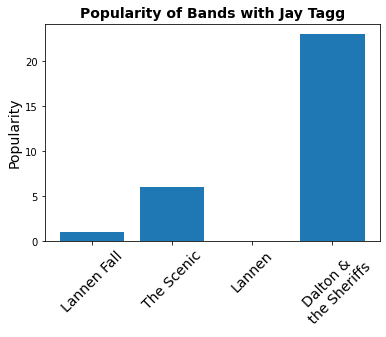

In [21]:
plt.bar(bands, jayBandPop)
plt.xticks(rotation=45, fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.title('Popularity of Bands with Jay Tagg', fontweight='bold', fontsize=14)

Text(0.5, 1.0, 'Number of Followers for Bands with Jay Tagg')

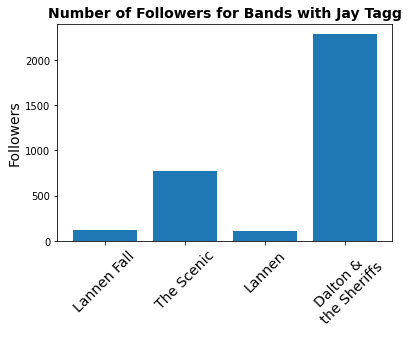

In [22]:
jayBandFollow = [lannenFall['followers']['total'], theScenic['followers']['total'],lannen['followers']['total'], dalton['followers']['total']]

plt.bar(bands, jayBandFollow)
plt.xticks(rotation=45, fontsize=14)
plt.ylabel('Followers', fontsize=14)
plt.title('Number of Followers for Bands with Jay Tagg', fontweight='bold', fontsize=14)

In [5]:
# fig, ax = plt.subplots(2,1, sharex=True, figsize=(5,10))
# ax[0].bar(bands, jayBandPop)
# ax[0].set_xticklabels(bands,rotation=45, fontsize=14)
# ax[0].set_ylabel('Popularity', fontsize=14)
# ax[0].set_title('Popularity of Bands with Jay Tagg', fontweight='bold', fontsize=14)

# ax[1].bar(bands, jayBandFollow)
# # ax[1].set_xticks(rotation=45, fontsize=14)
# ax[1].set_ylabel('Followers', fontsize=14)
# ax[1].set_title('Number of Followers for Bands with Jay Tagg', fontweight='bold', fontsize=14)

In [46]:
# sp.artist_top_tracks(daltonID, country='US')

## Exploring Albums 

In [24]:
luckier = sp.album(luckierID)

In [25]:
for key in luckier:
    print(key)

album_type
artists
available_markets
copyrights
external_ids
external_urls
genres
href
id
images
label
name
popularity
release_date
release_date_precision
total_tracks
tracks
type
uri


In [26]:
for key in luckier['tracks']:
    print(key)
    
# luckier['tracks']['items']

href
items
limit
next
offset
previous
total


In [16]:
# luckier
# luckier_df = pd.DataFrame.from_dict(luckier)
# lucker_df.head()

In [27]:
luckier_tracks = sp.album_tracks(luckierID)

In [25]:
# count = 0
# for key in luckier_tracks['items']:
#     count += 1
#     print(key)
# print('key count: ', count)

In [35]:
type(luckier_tracks['items'])

list

In [45]:
luckier_tracks['items'][0].get('id')

'69hE9a6camKM2ZALPfckIV'

In [94]:
# luckier_tracks

In [73]:
track_list = []
raw_track_list = luckier_tracks['items'].copy()

In [74]:
type(raw_track_list )

list

In [56]:
album_track_URIs = [raw_track_list[i].get('uri') for i in range(len(raw_track_list))]
# album_track_URIs

In [59]:
tracks_info_raw = sp.tracks(album_track_URIs, market='US')

In [61]:
type(tracks_info_raw)

dict

In [63]:
tracks_info_raw.keys()

dict_keys(['tracks'])

In [65]:
# tracks_info_raw['tracks']  ### returns a list

In [46]:
# track_dict = luckier_tracks.copy()
# track_dict = dict(raw_track_list)
# track_dict

# raw_track_list[0].get('name')

# track_info = [raw_track_list[0].get('track_number'), raw_track_list[0].get('name'), raw_track_list.get('uri')]

In [71]:
raw_track_list = tracks_info_raw['tracks']
track_list = []
for i in range(len(raw_track_list)):
    track_info = [raw_track_list[i].get('name'), raw_track_list[i].get('track_number'), raw_track_list[i].get('uri'), raw_track_list[i].get('popularity'), ]
    track_list.append(track_info)

In [72]:
track_list

[['Tell It Plain', 1, 'spotify:track:69hE9a6camKM2ZALPfckIV', 14],
 ['Cheap Seats', 2, 'spotify:track:2pc4JumxjDqZ1b7DPwX33v', 12],
 ['California Kid', 3, 'spotify:track:6xaqmNbSGCmjEjiWyEwvA0', 10],
 ['The Strummer', 4, 'spotify:track:3E39MkTSUbIds3lY1wcfnL', 12],
 ['Holding On', 5, 'spotify:track:4vciFvUV0oLrkKrWrl00dS', 11],
 ['Sunday Nights', 6, 'spotify:track:09ybluJcnqeOE39ONdB7Hc', 14],
 ['Boston', 7, 'spotify:track:4HJ7mSMtHAdU55lLjGE4zW', 15],
 ['Hand-Me-Down', 8, 'spotify:track:3b9nCGWTyf7bTRKPvyC9S8', 9],
 ['80 Good', 9, 'spotify:track:3Rt4CW4KLTNlVlpkrfuixM', 8],
 ['Her Good Name', 10, 'spotify:track:4tXJMxK2K4ITXRH6z9M26L', 8],
 ['Bones', 11, 'spotify:track:3JCpJihZb02ahRf59BPeVr', 7],
 ['The Ballad of Southie', 12, 'spotify:track:4j27PyoknqKy48NqRrZrgo', 9],
 ['Daves Street', 13, 'spotify:track:6em7Fr61PoOQLH9TkSHMGD', 8],
 ["St. Patrick's Day", 14, 'spotify:track:5sKRZ31xRYhad8HIGmbQQD', 8]]

In [51]:
luckier_df = pd.DataFrame(track_list, columns=['track_number', 'track_name', 'track_uri'])
luckier_df

,track_number,track_name,track_uri


In [56]:
type(luckier_df['track_uri'])

pandas.core.series.Series

### get audio features for a batch of tracks

In [50]:
track_audio_features = sp.audio_features(tracks=luckier_df['track_uri'].values.tolist())
# track_audio_features

NameError: name 'luckier_df' is not defined

In [72]:
test_df = pd.DataFrame.from_dict(track_audio_features)


In [75]:
# test_df.columns
drop_cols = ['type', 'id', 'uri', 'track_href', 'analysis_url']

In [77]:
test_df.drop(columns = drop_cols, inplace=True)

In [79]:
byhalf = pd.concat([luckier_df, test_df], axis=1)

In [80]:
byhalf.head()

,track_number,track_name,track_uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1,Tell It Plain,spotify:track:69hE9a6camKM2ZALPfckIV,0.401,0.810,10,-5.582,1,0.0505,0.001280,0.04140,0.0770,0.338,159.795,243133,4
1,2,Cheap Seats,spotify:track:2pc4JumxjDqZ1b7DPwX33v,0.532,0.927,2,-5.255,1,0.0403,0.000868,0.00908,0.3700,0.707,100.024,231867,4
2,3,California Kid,spotify:track:6xaqmNbSGCmjEjiWyEwvA0,0.446,0.940,7,-5.263,1,0.0683,0.001020,0.07350,0.2990,0.386,127.941,186333,4
3,4,The Strummer,spotify:track:3E39MkTSUbIds3lY1wcfnL,0.326,0.995,7,-3.644,1,0.3500,0.000531,0.38900,0.0548,0.429,216.020,186133,4
4,5,Holding On,spotify:track:4vciFvUV0oLrkKrWrl00dS,0.594,0.858,7,-5.757,1,0.0264,0.000470,0.23500,0.1420,0.431,99.999,209400,4


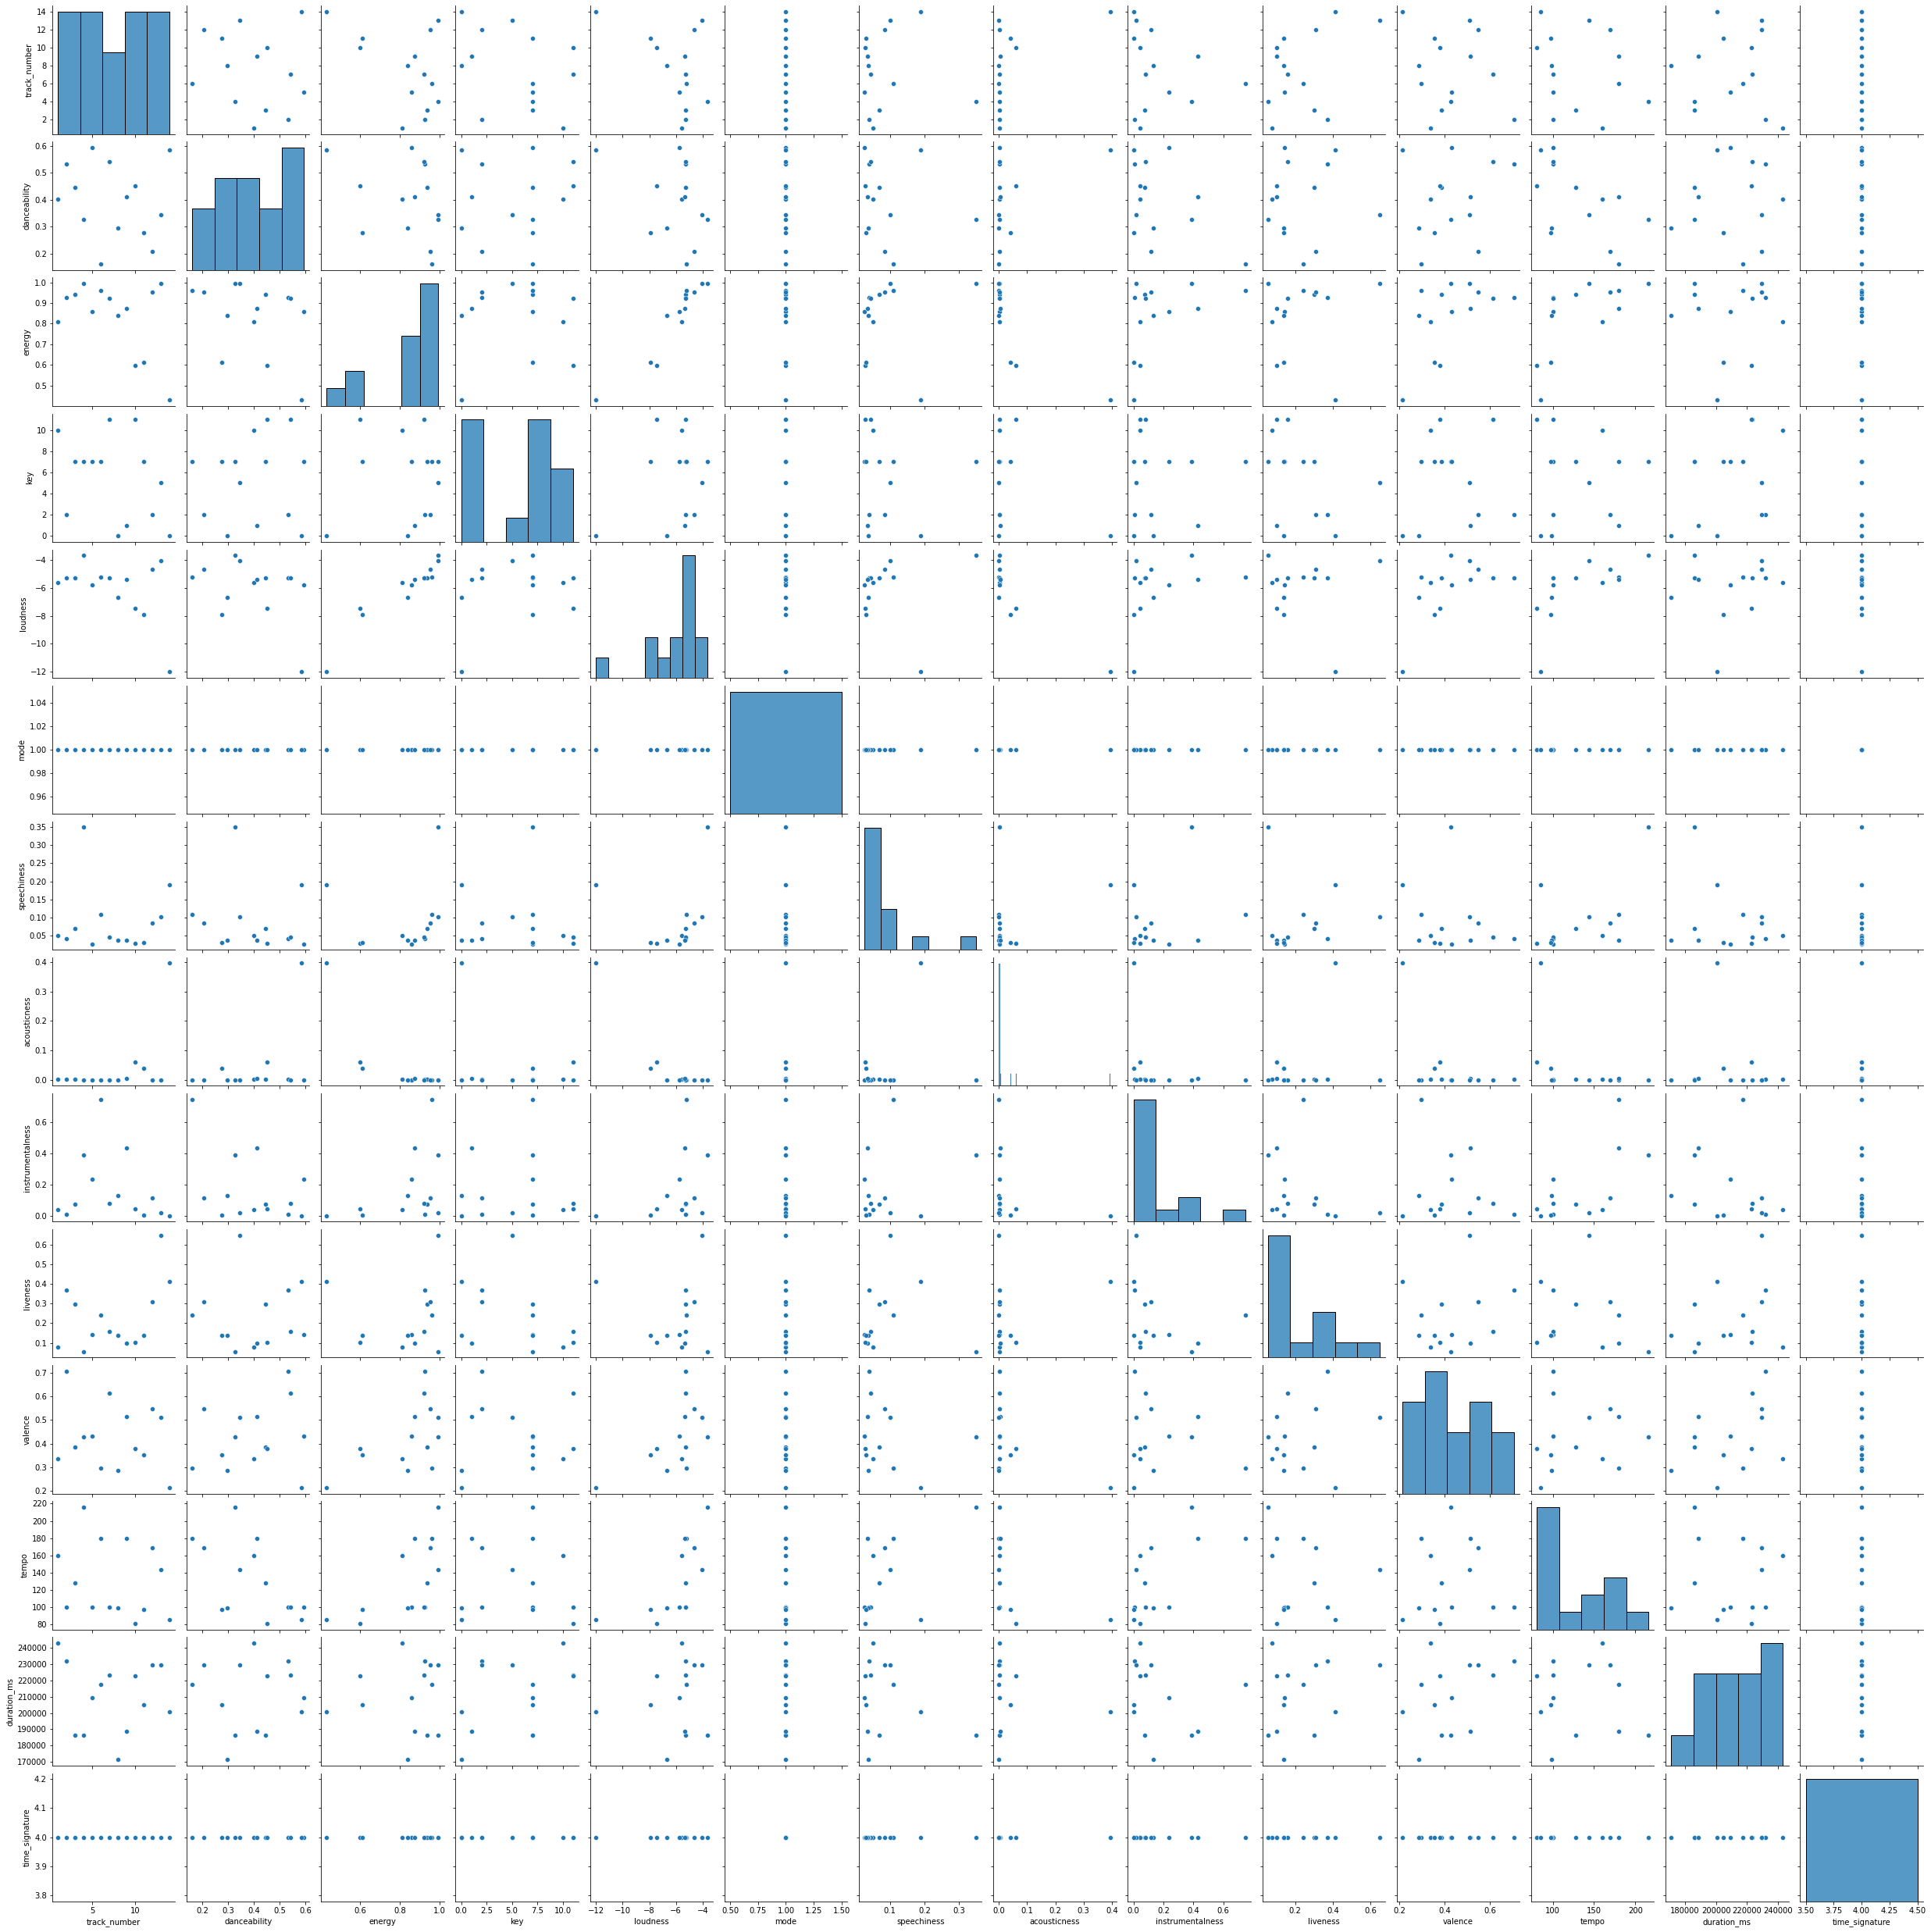

In [83]:
sns.pairplot(byhalf)

In [ ]:
{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'}, 'href': 'https://api.spotify.com/v1/artists/6flzo4uffk7TCeZOq4qVQ3', 'id': '6flzo4uffk7TCeZOq4qVQ3', 'name': 'Dalton & the Sheriffs', 'type': 'artist', 'uri': 'spotify:artist:6flzo4uffk7TCeZOq4qVQ3'}], 'disc_number': 1, 'duration_ms': 243133, 'explicit': False, 'external_urls': {'spotify': 'https://open.spotify.com/track/69hE9a6camKM2ZALPfckIV'}, 'href': 'https://api.spotify.com/v1/tracks/69hE9a6camKM2ZALPfckIV', 'id': '69hE9a6camKM2ZALPfckIV', 'is_local': False, 'is_playable': True, 'name': 'Tell It Plain', 'preview_url': 'https://p.scdn.co/mp3-preview/be48e0b0a31b7d6eb03f81b991102c2329fe098a?cid=c85f43a5a7004946996bc22659dd8de6', 'track_number': 1, 'type': 'track', 'uri': 'spotify:track:69hE9a6camKM2ZALPfckIV'}
{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'}, 'href': 'https://api.spotify.com/v1/artists/6flzo4uffk7TCeZOq4qVQ3', 'id': '6flzo4uffk7TCeZOq4qVQ3', 'name': 'Dalton & the Sheriffs', 'type': 'artist', 'uri': 'spotify:artist:6flzo4uffk7TCeZOq4qVQ3'}], 'disc_number': 1, 'duration_ms': 231866, 'explicit': False, 'external_urls': {'spotify': 'https://open.spotify.com/track/2pc4JumxjDqZ1b7DPwX33v'}, 'href': 'https://api.spotify.com/v1/tracks/2pc4JumxjDqZ1b7DPwX33v', 'id': '2pc4JumxjDqZ1b7DPwX33v', 'is_local': False, 'is_playable': True, 'name': 'Cheap Seats', 'preview_url': 'https://p.scdn.co/mp3-preview/fbb756a1bb72526212c3f6aa7f69bdc00f473cf8?cid=c85f43a5a7004946996bc22659dd8de6', 'track_number': 2, 'type': 'track', 'uri': 'spotify:track:2pc4JumxjDqZ1b7DPwX33v'}
{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'}, 'href': 'https://api.spotify.com/v1/artists/6flzo4uffk7TCeZOq4qVQ3', 'id': '6flzo4uffk7TCeZOq4qVQ3', 'name': 'Dalton & the Sheriffs', 'type': 'artist', 'uri': 'spotify:artist:6flzo4uffk7TCeZOq4qVQ3'}], 'disc_number': 1, 'duration_ms': 186333, 'explicit': False, 'external_urls': {'spotify': 'https://open.spotify.com/track/6xaqmNbSGCmjEjiWyEwvA0'}, 'href': 'https://api.spotify.com/v1/tracks/6xaqmNbSGCmjEjiWyEwvA0', 'id': '6xaqmNbSGCmjEjiWyEwvA0', 'is_local': False, 'is_playable': True, 'name': 'California Kid', 'preview_url': 'https://p.scdn.co/mp3-preview/bf2c31b7a3ad06f08f6df10389e230de8d565152?cid=c85f43a5a7004946996bc22659dd8de6', 'track_number': 3, 'type': 'track', 'uri': 'spotify:track:6xaqmNbSGCmjEjiWyEwvA0'}
{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'}, 'href': 'https://api.spotify.com/v1/artists/6flzo4uffk7TCeZOq4qVQ3', 'id': '6flzo4uffk7TCeZOq4qVQ3', 'name': 'Dalton & the Sheriffs', 'type': 'artist', 'uri': 'spotify:artist:6flzo4uffk7TCeZOq4qVQ3'}], 'disc_number': 1, 'duration_ms': 186133, 'explicit': False, 'external_urls': {'spotify': 'https://open.spotify.com/track/3E39MkTSUbIds3lY1wcfnL'}, 'href': 'https://api.spotify.com/v1/tracks/3E39MkTSUbIds3lY1wcfnL', 'id': '3E39MkTSUbIds3lY1wcfnL', 'is_local': False, 'is_playable': True, 'name': 'The Strummer', 'preview_url': 'https://p.scdn.co/mp3-preview/07b56c3841f40324e3292f2066800bf8a1a1456d?cid=c85f43a5a7004946996bc22659dd8de6', 'track_number': 4, 'type': 'track', 'uri': 'spotify:track:3E39MkTSUbIds3lY1wcfnL'}
{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'}, 'href': 'https://api.spotify.com/v1/artists/6flzo4uffk7TCeZOq4qVQ3', 'id': '6flzo4uffk7TCeZOq4qVQ3', 'name': 'Dalton & the Sheriffs', 'type': 'artist', 'uri': 'spotify:artist:6flzo4uffk7TCeZOq4qVQ3'}], 'disc_number': 1, 'duration_ms': 209400, 'explicit': False, 'external_urls': {'spotify': 'https://open.spotify.com/track/4vciFvUV0oLrkKrWrl00dS'}, 'href': 'https://api.spotify.com/v1/tracks/4vciFvUV0oLrkKrWrl00dS', 'id': '4vciFvUV0oLrkKrWrl00dS', 'is_local': False, 'is_playable': True, 'name': 'Holding On', 'preview_url': 'https://p.scdn.co/mp3-preview/80db2a1bbf431410990d68ecd0db282846e196aa?cid=c85f43a5a7004946996bc22659dd8de6', 'track_number': 5, 'type': 'track', 'uri': 'spotify:track:4vciFvUV0oLrkKrWrl00dS'}
{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'}, 'href': 'https://api.spotify.com/v1/artists/6flzo4uffk7TCeZOq4qVQ3', 'id': '6flzo4uffk7TCeZOq4qVQ3', 'name': 'Dalton & the Sheriffs', 'type': 'artist', 'uri': 'spotify:artist:6flzo4uffk7TCeZOq4qVQ3'}], 'disc_number': 1, 'duration_ms': 217426, 'explicit': False, 'external_urls': {'spotify': 'https://open.spotify.com/track/09ybluJcnqeOE39ONdB7Hc'}, 'href': 'https://api.spotify.com/v1/tracks/09ybluJcnqeOE39ONdB7Hc', 'id': '09ybluJcnqeOE39ONdB7Hc', 'is_local': False, 'is_playable': True, 'name': 'Sunday Nights', 'preview_url': 'https://p.scdn.co/mp3-preview/119e340c678998c182c7f276bc797f728bfea590?cid=c85f43a5a7004946996bc22659dd8de6', 'track_number': 6, 'type': 'track', 'uri': 'spotify:track:09ybluJcnqeOE39ONdB7Hc'}
{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'}, 'href': 'https://api.spotify.com/v1/artists/6flzo4uffk7TCeZOq4qVQ3', 'id': '6flzo4uffk7TCeZOq4qVQ3', 'name': 'Dalton & the Sheriffs', 'type': 'artist', 'uri': 'spotify:artist:6flzo4uffk7TCeZOq4qVQ3'}], 'disc_number': 1, 'duration_ms': 223440, 'explicit': False, 'external_urls': {'spotify': 'https://open.spotify.com/track/4HJ7mSMtHAdU55lLjGE4zW'}, 'href': 'https://api.spotify.com/v1/tracks/4HJ7mSMtHAdU55lLjGE4zW', 'id': '4HJ7mSMtHAdU55lLjGE4zW', 'is_local': False, 'is_playable': True, 'name': 'Boston', 'preview_url': 'https://p.scdn.co/mp3-preview/9a0440c9bf0c6f6bec153992f7574107e43a6f24?cid=c85f43a5a7004946996bc22659dd8de6', 'track_number': 7, 'type': 'track', 'uri': 'spotify:track:4HJ7mSMtHAdU55lLjGE4zW'}
{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'}, 'href': 'https://api.spotify.com/v1/artists/6flzo4uffk7TCeZOq4qVQ3', 'id': '6flzo4uffk7TCeZOq4qVQ3', 'name': 'Dalton & the Sheriffs', 'type': 'artist', 'uri': 'spotify:artist:6flzo4uffk7TCeZOq4qVQ3'}], 'disc_number': 1, 'duration_ms': 171226, 'explicit': False, 'external_urls': {'spotify': 'https://open.spotify.com/track/3b9nCGWTyf7bTRKPvyC9S8'}, 'href': 'https://api.spotify.com/v1/tracks/3b9nCGWTyf7bTRKPvyC9S8', 'id': '3b9nCGWTyf7bTRKPvyC9S8', 'is_local': False, 'is_playable': True, 'name': 'Hand-Me-Down', 'preview_url': 'https://p.scdn.co/mp3-preview/bf20b12dd261b7f76454608b9079ab5c8cfeb2fd?cid=c85f43a5a7004946996bc22659dd8de6', 'track_number': 8, 'type': 'track', 'uri': 'spotify:track:3b9nCGWTyf7bTRKPvyC9S8'}
{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'}, 'href': 'https://api.spotify.com/v1/artists/6flzo4uffk7TCeZOq4qVQ3', 'id': '6flzo4uffk7TCeZOq4qVQ3', 'name': 'Dalton & the Sheriffs', 'type': 'artist', 'uri': 'spotify:artist:6flzo4uffk7TCeZOq4qVQ3'}], 'disc_number': 1, 'duration_ms': 188626, 'explicit': False, 'external_urls': {'spotify': 'https://open.spotify.com/track/3Rt4CW4KLTNlVlpkrfuixM'}, 'href': 'https://api.spotify.com/v1/tracks/3Rt4CW4KLTNlVlpkrfuixM', 'id': '3Rt4CW4KLTNlVlpkrfuixM', 'is_local': False, 'is_playable': True, 'name': '80 Good', 'preview_url': 'https://p.scdn.co/mp3-preview/54ef6f35affba7e538491b00a9298b00dee6ba17?cid=c85f43a5a7004946996bc22659dd8de6', 'track_number': 9, 'type': 'track', 'uri': 'spotify:track:3Rt4CW4KLTNlVlpkrfuixM'}
{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'}, 'href': 'https://api.spotify.com/v1/artists/6flzo4uffk7TCeZOq4qVQ3', 'id': '6flzo4uffk7TCeZOq4qVQ3', 'name': 'Dalton & the Sheriffs', 'type': 'artist', 'uri': 'spotify:artist:6flzo4uffk7TCeZOq4qVQ3'}], 'disc_number': 1, 'duration_ms': 222880, 'explicit': False, 'external_urls': {'spotify': 'https://open.spotify.com/track/4tXJMxK2K4ITXRH6z9M26L'}, 'href': 'https://api.spotify.com/v1/tracks/4tXJMxK2K4ITXRH6z9M26L', 'id': '4tXJMxK2K4ITXRH6z9M26L', 'is_local': False, 'is_playable': True, 'name': 'Her Good Name', 'preview_url': 'https://p.scdn.co/mp3-preview/625705444e2e6e53b00fa0b6208a3b115a7bf839?cid=c85f43a5a7004946996bc22659dd8de6', 'track_number': 10, 'type': 'track', 'uri': 'spotify:track:4tXJMxK2K4ITXRH6z9M26L'}
{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'}, 'href': 'https://api.spotify.com/v1/artists/6flzo4uffk7TCeZOq4qVQ3', 'id': '6flzo4uffk7TCeZOq4qVQ3', 'name': 'Dalton & the Sheriffs', 'type': 'artist', 'uri': 'spotify:artist:6flzo4uffk7TCeZOq4qVQ3'}], 'disc_number': 1, 'duration_ms': 204893, 'explicit': False, 'external_urls': {'spotify': 'https://open.spotify.com/track/3JCpJihZb02ahRf59BPeVr'}, 'href': 'https://api.spotify.com/v1/tracks/3JCpJihZb02ahRf59BPeVr', 'id': '3JCpJihZb02ahRf59BPeVr', 'is_local': False, 'is_playable': True, 'name': 'Bones', 'preview_url': 'https://p.scdn.co/mp3-preview/c8522804103959c6c17a6664ae83e39851c03c9e?cid=c85f43a5a7004946996bc22659dd8de6', 'track_number': 11, 'type': 'track', 'uri': 'spotify:track:3JCpJihZb02ahRf59BPeVr'}
{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'}, 'href': 'https://api.spotify.com/v1/artists/6flzo4uffk7TCeZOq4qVQ3', 'id': '6flzo4uffk7TCeZOq4qVQ3', 'name': 'Dalton & the Sheriffs', 'type': 'artist', 'uri': 'spotify:artist:6flzo4uffk7TCeZOq4qVQ3'}], 'disc_number': 1, 'duration_ms': 229533, 'explicit': False, 'external_urls': {'spotify': 'https://open.spotify.com/track/4j27PyoknqKy48NqRrZrgo'}, 'href': 'https://api.spotify.com/v1/tracks/4j27PyoknqKy48NqRrZrgo', 'id': '4j27PyoknqKy48NqRrZrgo', 'is_local': False, 'is_playable': True, 'name': 'The Ballad of Southie', 'preview_url': 'https://p.scdn.co/mp3-preview/c030bc9c9d962b2e06897e4edf79d57e63c54083?cid=c85f43a5a7004946996bc22659dd8de6', 'track_number': 12, 'type': 'track', 'uri': 'spotify:track:4j27PyoknqKy48NqRrZrgo'}
{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'}, 'href': 'https://api.spotify.com/v1/artists/6flzo4uffk7TCeZOq4qVQ3', 'id': '6flzo4uffk7TCeZOq4qVQ3', 'name': 'Dalton & the Sheriffs', 'type': 'artist', 'uri': 'spotify:artist:6flzo4uffk7TCeZOq4qVQ3'}], 'disc_number': 1, 'duration_ms': 229466, 'explicit': False, 'external_urls': {'spotify': 'https://open.spotify.com/track/6em7Fr61PoOQLH9TkSHMGD'}, 'href': 'https://api.spotify.com/v1/tracks/6em7Fr61PoOQLH9TkSHMGD', 'id': '6em7Fr61PoOQLH9TkSHMGD', 'is_local': False, 'is_playable': True, 'name': 'Daves Street', 'preview_url': 'https://p.scdn.co/mp3-preview/e57993424bc07f7a55c746398721fe8a0ed025fc?cid=c85f43a5a7004946996bc22659dd8de6', 'track_number': 13, 'type': 'track', 'uri': 'spotify:track:6em7Fr61PoOQLH9TkSHMGD'}
{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6flzo4uffk7TCeZOq4qVQ3'}, 'href': 'https://api.spotify.com/v1/artists/6flzo4uffk7TCeZOq4qVQ3', 'id': '6flzo4uffk7TCeZOq4qVQ3', 'name': 'Dalton & the Sheriffs', 'type': 'artist', 'uri': 'spotify:artist:6flzo4uffk7TCeZOq4qVQ3'}], 'disc_number': 1, 'duration_ms': 200840, 'explicit': False, 'external_urls': {'spotify': 'https://open.spotify.com/track/5sKRZ31xRYhad8HIGmbQQD'}, 'href': 'https://api.spotify.com/v1/tracks/5sKRZ31xRYhad8HIGmbQQD', 'id': '5sKRZ31xRYhad8HIGmbQQD', 'is_local': False, 'is_playable': True, 'name': "St. Patrick's Day", 'preview_url': 'https://p.scdn.co/mp3-preview/56d2fcb0b79356cdaca9a4c350ccd703bcdb5a78?cid=c85f43a5a7004946996bc22659dd8de6', 'track_number': 14, 'type': 'track', 'uri': 'spotify:track:5sKRZ31xRYhad8HIGmbQQD'}

In [3]:
mindup = 'spotify:track:4cXdWLcvruvi6OW7we4C7T'

sp.audio_features(mindup)

[{'danceability': 0.403,
  'energy': 0.721,
  'key': 3,
  'loudness': -5.714,
  'mode': 1,
  'speechiness': 0.033,
  'acousticness': 3.2e-05,
  'instrumentalness': 0.159,
  'liveness': 0.124,
  'valence': 0.389,
  'tempo': 139.963,
  'type': 'audio_features',
  'id': '4cXdWLcvruvi6OW7we4C7T',
  'uri': 'spotify:track:4cXdWLcvruvi6OW7we4C7T',
  'track_href': 'https://api.spotify.com/v1/tracks/4cXdWLcvruvi6OW7we4C7T',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4cXdWLcvruvi6OW7we4C7T',
  'duration_ms': 277320,
  'time_signature': 4}]

## Tracks <a class="anchor" id="topic-2"></a>
<hr/>

### Calling information for single track

In [38]:
daves_st = sp.track(davesID)

In [40]:
# daves_st

In [41]:
type(daves_st)

dict

In [36]:
daves_st.keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [37]:
daves_st.get('popularity')

8

In [42]:
### checking if you can chain this call
sp.track(davesID).get('popularity')

8

### Calling information for list of tracks

In [8]:
dalton_track_list = sp.tracks([davesURI, holdingURI, youherURI], market='US')

In [12]:
dalton_track_list['tracks'][0].get('popularity')

8

In [43]:
### Note: returns full track item, not simplified version like album_tracks does.